In [2]:
# 1. Introduction
# A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences.
# It also including chance event outcomes, resource costs, and utility.
# It is widely used supervised learning algorithms both for regression and classification tasks.
# Everyday we need to make numerous decisions, many small and a few big.
# Whenever we are in dilemna, we are always taking decisions unconsciously using the help of decision tree.
# We take series of questions in a nested IF-THEN statement and reach to a particular outcome

In [3]:
# 2. Problem Statement
#RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912.
#On April 15, 1912 the Titanic sank, costing the lives of 1502 out of 2224 passengers and crew.
#Unfortunately, there weren’t enough lifeboats for everyone onboard, causing a disproportionate number of deaths.
#The reason behind sinking of this beauty was because of striking to an iceberg while travelling from Southampton to New York City.
#While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In [4]:
#Scenario
#One of the most popular disasters in the history is the sinking of the RMS Titanic.
#Let's say, after the accident, there is a need to implement better regulations for passenger liners.
#As a part of a data science team, you have been tasked with analyzing the passenger data of the RMS Titanic.
#You have been provided with the data that contains the information about the passengers aboarded the ship.
#The purpose is to analyze and explore factors that can influence a person’s likelihood to survive.
#So, the primary objectives are to:
#Do a statistical analysis of how some group of people were survived more than others.
#Perform an Exploratory Data Analysis of titanic dataset with visualizations and storytelling.
#Do modelling of data to come up with a model with best fit of accuracy score and which explains the 
#solution of above issue appropriately.

In [5]:
# 3. Installing Libraries

In [39]:
# 3.1 Installing Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [7]:
#3.2 Upgrading Libraries
#After upgrading the libraries, you need to restart the runtime to make the libraries in sync.
#Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [40]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

zsh:1: command not found: pip
zsh:1: command not found: pip


In [41]:
#3.3 Importing Libraries

#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter setting for the algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [ ]:
# 4. Data Acquisition & Description- Ask to enter it

In [ ]:
# The dataset consists of the information about people boarding the famous RMS Titanic.
#Records	Features	Dataset Size
#891	12	58.9 KB

#ID	Feature Name	Description of the feature
#01	PassengerId	Identity of the passenger
#02	Survived	Whether the passenger survived or not
#03	Pclass	Class of the ticket holder
#04	Name	Name of the passenger
#05	Sex	Sex of the passenger
#06	Age	Age of the passenger
#07	SibSp	Siblings and/or spouse travelling with passenger
#08	Parch	Parents and/or children travelling with passenger
#09	Ticket	Ticket number
#10	Fare	Price of the ticket
#11	Cabin	Cabin number
#12	Embarked	Port of Embarkation

In [99]:
# Load the data
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')

# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#4.1 Data Description
#In this section we will get information about the data and see some observations.

In [100]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Observations:
    
#Survived:
#More than 50% did not survive the accident.

#Pclass:
#There are a lot more 3rd class passengers than 1st and 2nd class.
#We can also see that there are more 2nd class passengers than 1st class passengers.
#SibSp:
#More than 50% of passengers are not travelling with their siblings or a spouse.
#There are some passengers who are travelling with as maximum as 8 siblings and spouse.
#Parch:
#More than 75% passengers are not travelling with a parent or children
#But there are some passengers who have a maximum number of 6 children and/or parents with them on the ship.
#We observe that a vast majority of passengers are not travelling with their family members.
#Age:
#The average age of passengers is around 29 years while the minimum and maximum ages are 0.4 years and 80 years respectively.
#There is some missing data in the Age feature.
#Fare:
#The average price of ticket seems to be £32.2. Minimum price of the ticket is recorded as £0 and maximum price recorded as high as £512.32.
#More than 50% of the passengers have paid atleast £14
#More than 75% passengers have paid atleast £7 for their ticket whereas less than 25% have paid for more than £31.
#We have to replace the minimum value in the Fare feature with a reasonable value.

In [ ]:
#4.2 Data Information

In [ ]:
#In this section we will see the information about the types of the features

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Observations:
#The data types of all the features look appropriate.
#There are missing values present in the Age, Cabin and Embarked features.
#Age and Cabin have a significant amount of missing values which requires further investigation.

In [ ]:
#5. Data Pre-processing

In [ ]:
#5.1 Data Pre-profiling

In [ ]:
#For quick analysis pandas profiling is very handy.
#Generates profile reports from a pandas DataFrame.
#For each column statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [ ]:
**Observations:**

- The report shows that there are a **total** of **12 features** out of which **7** are **numerical** and **5** are **categorical**.

- Only **342** passengers out of **891** survived the accident.

- **Name**, **Ticket**, and **Cabin** features have high cardinality and are uniformly distributed.

- **PassengerId** is having a uniformly distribution in the dataset.

- **Fare** feature is highly skewed towards right while **Age** feature is faily symmetrical.

- There are **no duplicate** rows in the dataset while a lot of **zeros** are present in **Fare**, **Sibsp** and **Parch** features.

- We can observe that **8.1%** of data in cells is **missing**:
  - Age (17 missing values) &rarr; Fill with median.
  - Cabin (687 missing values) &rarr; Fill with median.
  - Embarked (2 missing values) &rarr; Fill with mode.

- **Embarked** feature has just **2 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

In [ ]:
# 5.2 Data Cleaning

In [ ]:
#Now we will perform all the necessary operations that are required to clean and rectify the schema of the dataset.

In [102]:
# Filling the missing values of Embarked feature with the mode of the feature.
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# Filling the missing values of Age feature with the median age.
data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Dropping the Cabin feature as has many missing values
data.drop(labels='Cabin', axis=1, inplace=True)

In [ ]:
# 5.3 Data Post Profilling
#Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

In [ ]:
# post_profile=ProfileReport(df=data)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

In [ ]:
Observations:
You can compare the two reports, i.e Pre Profiling Report.html and Post Profiling Report.html.
Observations in Post Profiling Report.html:
In the Dataset info, Total Missing = 0.0%
Number of features = 11
You can see the difference in the Age feature in both the reports.
A lot of zeros are present in Sibsp and Parch features. They won't be removed as they are necessary.
We can observe that Pclass and Fare are highly correlated to each other inversely.
A lot of inverse correlations are observed among the features.
For detailed information, check the Post Profiling Report.html file.
We can now begin the Exploratory Data Analysis.

In [ ]:
# 6. Exploratory Data Analysis

In [ ]:
#Before diving further, we will create some new features that will be useful for analyzing the data.
#These features will be FamilySize 
#The FamilySize will describe the frequency of family members.

In [103]:
# Creating a new feature FamilySize from Sibsp and Parch
data['Family Size'] = data['SibSp'] + data['Parch'] + 1

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [104]:
# Creating another variable for easy analysis i.e Gender calss in which all passenger less than 15 years will be child other 
# will be described as per 'sex' variable
#lambda argument : expression
# e.g z = lambda a : a*a
# z(3)

data['GenderClass']= data.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [ ]:
# Creating crsoss tabs to assess data further

In [105]:
data.groupby(['Sex']).mean()[["Survived"]]

# Interpretation- The survival among female passengers was more than male passengers.

,Survived
Sex,
female,0.742038
male,0.188908


In [106]:
data.groupby(['GenderClass']).mean()[["Survived"]]

#Interpretation- The survival among passengers was highest in females followed by children. 

,Survived
GenderClass,
child,0.576923
female,0.760000
male,0.163569


In [107]:
data.groupby(['GenderClass', 'Pclass']).mean()[["Survived"]]

# Interpretation- The survival among passengers of 1st and 2nd class among Children as well females was high.

Survived
GenderClass Pclass          
child       1       0.800000
            2       1.000000
            3       0.407407
female      1       0.978261
            2       0.909091
            3       0.504274
male        1       0.352941
            2       0.080808
            3       0.118750

In [ ]:
#7. Post Data Processing

In [108]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [ ]:
#7.1 Feature Selection
#Here we will visualize  the correlation of input features using Heatmap.
#If we see a case of correlation we will remove the highly correlated feature.

In [109]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
Family Size,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


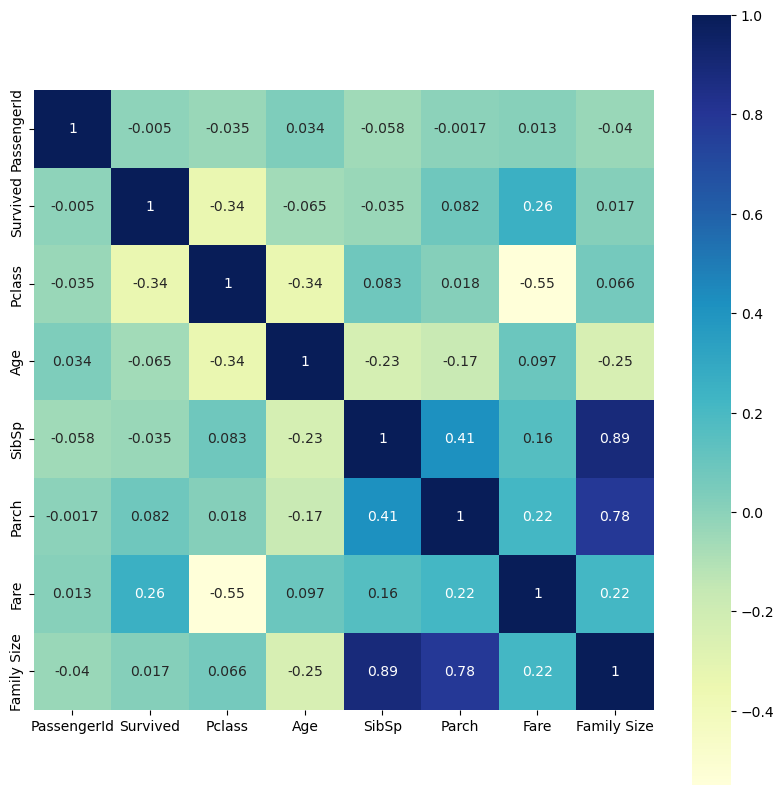

In [89]:
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap='YlGnBu', annot=True, square=True)
plt.show()

# cmap gives color to map of yellow green and blue. Annot helps in putting correlation values in each square
# and square helps in making the garph more presentable

# Interpretation:-

# Age and Pclass are negatively corelated with Survived.
#FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
#Fare and FamilySize are positively coorelated with Survived.
#With high corelation we face redundancy issues.

In [ ]:
# We will drop few features like 'Name','Ticket','SibSp','Parch', 'Ticket', 'PassengerId'

In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [111]:
data.drop(labels= ['PassengerId','Name','Sex','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [112]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,Family Size,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


In [ ]:
#7.2 Data Encoding
#In this section, we will encode our categorical features such as Sex, Embarked, Title using one hot encoding.

#Hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model. 
#The advantages of using one hot encoding include: It allows the use of categorical variables in models that 
#require numerical input.

In [113]:
# Performing one hot encoding over sex, embarked, title
data = pd.get_dummies(data=data, columns=['Embarked', 'GenderClass'])
data.head(2)

,Survived,Pclass,Age,Fare,Family Size,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male
0,0,3,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,0,0,1,0


In [ ]:
#7.3 Data Preparation
#No data scaling is required for Decision Tree as they are giant if-else conditional statements.

#Spliting of data into dependent and independent variables for further development

In [114]:
# Instatiatig input and output data by dropping unnecessary data features
X = data.loc[ : ,data.columns!='Survived']

X.head()

# The loc command The function . loc is typically used for label indexing and 
#can access multiple columns, while . iloc is used for integer indexing

,Pclass,Age,Fare,Family Size,Embarked_C,Embarked_Q,Embarked_S,GenderClass_child,GenderClass_female,GenderClass_male
0,3,22.0,7.2500,2,0,0,1,0,0,1
1,1,38.0,71.2833,2,1,0,0,0,1,0
2,3,26.0,7.9250,1,0,0,1,0,1,0
3,1,35.0,53.1000,2,0,0,1,0,1,0
4,3,35.0,8.0500,1,0,0,1,0,0,1


In [115]:
y = data.Survived

y.shape

(891,)

In [ ]:
#7.4 Splitting data into test and train dataset

In [116]:
#Splitting data into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

#Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

#random_state command helps to split  In other words, it ensures that the same randomization is used each time you run 
#the code, resulting in the same splits of the data

#test_size test_size determines the portion of the data which will go into test sets 
# and a random state is used for data reproducibility

#The stratify command The sole purpose of the argument is to ensure that the same proportion of examples 
# is preserved across each class of training and testing data.

X_train shape:  (712, 10)
y_train shape:  (712,)
X_test shape:  (179, 10)
y_test shape:  (179,)


In [ ]:
#8. Model Developement and Evaluation

#In this section we will develop Decision Tree model
#Then we will analyze the results obtained and make our observations.
#We will use several parameteres to see how the model can be best fit with using different indexes

In [117]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
model

DecisionTreeClassifier(random_state=0)

In [121]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_9 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 28.86
|   |   |   |--- feature_2 <= 28.23
|   |   |   |   |--- feature_1 <= 56.00
|   |   |   |   |   |--- feature_1 <= 25.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  25.00
|   |   |   |   |   |   |--- feature_1 <= 26.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  26.50
|   |   |   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 17.43
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  17.43
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  27.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  37.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 39.00
|   |   |   |   |   |   |   |   |   |   

[Text(0.44197303921568626, 0.9736842105263158, 'X[9] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.14644607843137256, 0.9210526315789473, 'X[0] <= 2.5\ngini = 0.402\nsamples = 283\nvalue = [79, 204]'),
 Text(0.047058823529411764, 0.868421052631579, 'X[2] <= 28.856\ngini = 0.091\nsamples = 147\nvalue = [7, 140]'),
 Text(0.03137254901960784, 0.8157894736842105, 'X[2] <= 28.231\ngini = 0.183\nsamples = 59\nvalue = [6, 53]'),
 Text(0.023529411764705882, 0.7631578947368421, 'X[1] <= 56.0\ngini = 0.158\nsamples = 58\nvalue = [5, 53]'),
 Text(0.01568627450980392, 0.7105263157894737, 'X[1] <= 25.0\ngini = 0.131\nsamples = 57\nvalue = [4, 53]'),
 Text(0.00784313725490196, 0.6578947368421053, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.023529411764705882, 0.6578947368421053, 'X[1] <= 26.5\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.01568627450980392, 0.6052631578947368, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03137254901960784, 0.60526315789

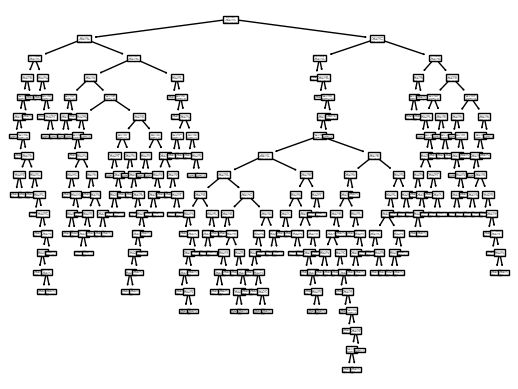

In [122]:
tree.plot_tree(model)

In [123]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

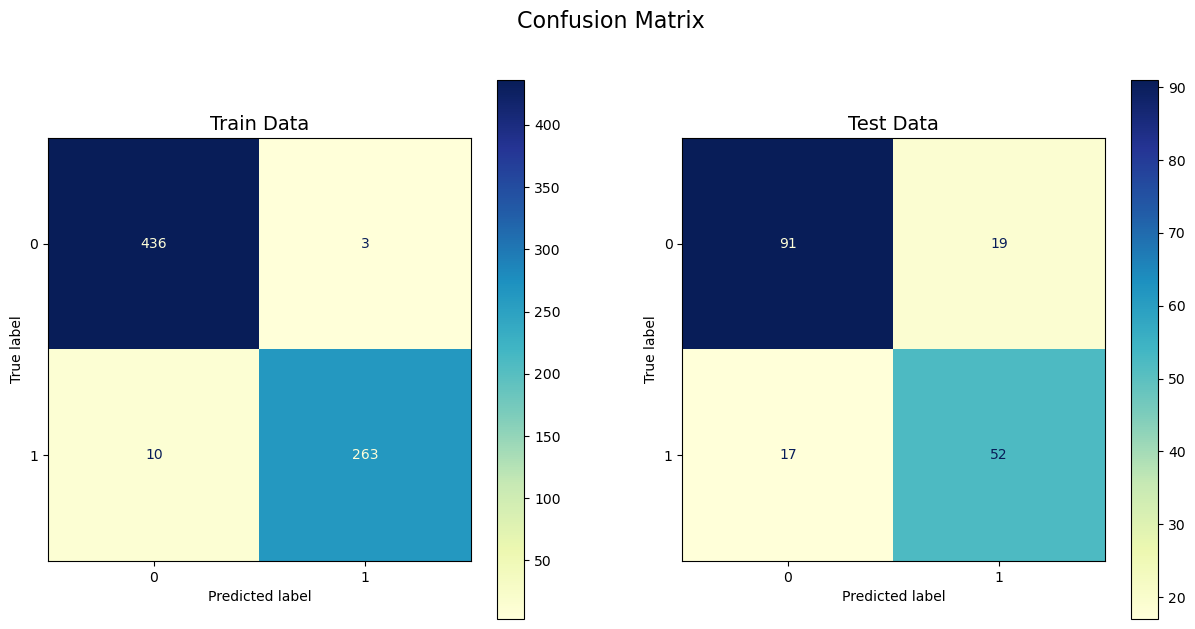

In [124]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=model, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [127]:
# Manual calculation of accuracy score as per confusion matrix
#(TN+TP)/(TN+FN+TP+FP)

# accuracy of train data
(436+263)/(436+3+10+263)*100

98.17415730337079

In [128]:
#manual calculation of accuracy score on test data
(91+52)/(91+19+52+17)*100

79.88826815642457

In [ ]:
# Interpreation of confusion matrix- Model overfitted as difference between train and test data more than 5%

In [126]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

print('                Training Report              ')
print(train_report)
print('                Testing Report               ')
print(test_report)

#Model is overfitted by looking at the accuracy score of train (0.98) and test (0.80) data

                Training Report              
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

                Testing Report               
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
#8.1 Modelling for improving the difference between accuracy score of test and train data

In [129]:
#8.1.1 Model 1 with grid search CV

hp_to_be_tuned = {
    "criterion": ["gini","entropy"],
    "max_depth": [1,2,3,4,5,None]
}

In [130]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=hp_to_be_tuned, cv=10, n_jobs=1) 

In [131]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [132]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [133]:
grid.best_score_

0.8315727699530516

In [134]:
y_pred_test = grid.predict(X_test)
y_pred_train = grid.predict(X_train)

In [135]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

print('                Training Report              ')
print(train_report)
print('                Testing Report               ')
print(test_report)

#The difference between train and test dataset accuracy score is less than 5% after modelling

                Training Report              
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       439
           1       0.81      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.83      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712

                Testing Report               
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [137]:
#8.1.2 Model 2 by using criteria like gini or entropy, max_depth, min_samples_split and min_samples_leaf

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
model2.fit(X_train,y_train)
model2

DecisionTreeClassifier(max_depth=3, random_state=0)

In [139]:
hp_to_be_tuned2 = {
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "min_samples_split" : [1,2,3,4,5,6,7,None],
    "min_samples_leaf" : [1,2,3,4,5,6,7,None]
}

In [141]:
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(model, param_grid=hp_to_be_tuned2, cv=10, n_jobs=1,verbose=True)

#cv=10 means ten fold cross validation, which essentially means that the sample data is being 
#split into ten smaller samples respectively.

#n_jobs=1 means number of processes you wish to run in parallel for this task if it -1 
# it will use all available processors.

#verbose is a parameter which prints messages on the standard output.

In [142]:
grid2.fit(X_train,y_train)

Fitting 10 folds for each of 1024 candidates, totalling 10240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             verbose=True)

In [143]:
grid2.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [144]:
grid2.best_score_

0.8385758998435054

In [148]:
y_pred_test= grid2.predict(X_test)

y_pred_train= grid2.predict(X_train)

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [152]:
#training accuracy
accuracy_score(y_train,y_pred_train)

0.8693820224719101

In [153]:
#testing accuracy
accuracy_score(y_test,y_pred_test)

0.8044692737430168

In [149]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

print('                Training Report              ')
print(train_report)
print('                Testing Report               ')
print(test_report)

                Training Report              
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       439
           1       0.88      0.77      0.82       273

    accuracy                           0.87       712
   macro avg       0.87      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712

                Testing Report               
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [154]:
#8.1.3 Model 3- Modelling with parameters obtained from grid

model3 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3,
                               min_samples_leaf=1,min_samples_split=2)
model3.fit(X_train,y_train)
model3

DecisionTreeClassifier(max_depth=3, random_state=0)

In [155]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

In [156]:
#Train data accuracy
accuracy_score(y_train, y_pred_train)

0.8398876404494382

In [157]:
#Test data accuracy
accuracy_score(y_test, y_pred_test)

0.8212290502793296

In [159]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

print('                Training Report              ')
print(train_report)
print('                Testing Report               ')
print(test_report)

                Training Report              
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       439
           1       0.81      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.83      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712

                Testing Report               
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
#Observations:
#We can observe that we model is performing well on training data as well as on testing set .
#With difference being less than 5% between train and test data.

In [ ]:
#9. Interpretation

#Modelling has shown that by adding several criterias like Gini, entropy, which help in selection of attribute
# of splitting, other decision tree pruning methods for managing overfitting like
# maximum depth, minimum sample leaf and minimum sample split managed to improve the
# difference between the accuracy score of test as well as train data
#But for final interpretation on which model fits best we need statistical tests like AUC
# for interpretation.



